# **THIS NOTEBOOK CONTAINS THE REPORT AS WELL.**

**report description of the assignment is at the very end under the section name Report.**

# Question 1

Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [ ]:
import numpy as np

In [ ]:
def generate_X(N):
  X = []
  for i in range(N):
    X = np.random.uniform(size = N)
  return X

In [ ]:
X = generate_X(20)
print('20 Uniformly distributed random variables are :')
print(X)

20 Uniformly distributed random variables are :
[0.78938002 0.33157513 0.78598403 0.59129987 0.47035189 0.64889641
 0.58472103 0.0618906  0.42024901 0.71719943 0.57879746 0.60930452
 0.88030561 0.63398472 0.22885138 0.47892786 0.97921782 0.10531742
 0.30830269 0.10580863]


# Question 2

Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the relation

Yi = sin(2 π x i ) + ϵ i where ϵ i ~ N(0,0.25)

In [ ]:
import math

In [ ]:
def generate_Y(X, N):
  PI = math.pi
  Exp = 2*PI*X
  Epsilon = np.random.normal(0, 0.25, size = N)
  # print(Epsilon)
  Y = np.sin(Exp) + Epsilon
  return Y

In [ ]:
Y = generate_Y(X, 20)
print('20 output for X datapoints are :')
print(Y)

20 output for X datapoints are :
[-0.92425289  1.03951639 -0.9480243  -0.56355602  0.08763402 -0.95270376
 -0.71648746  0.54483456  0.71459886 -0.71728125 -0.74552529 -0.11948154
 -1.10277904 -1.08509895  1.08245367  0.07093497 -0.3792553   0.36716978
  1.60572261  0.79760895]


In [ ]:
def create_XY_set(X, Y):
  result = np.array(list(zip(X,Y)))
  # print(result)
  return result

In [ ]:
training_set = create_XY_set(X, Y)
training_set

array([[ 0.78938002, -0.92425289],
       [ 0.33157513,  1.03951639],
       [ 0.78598403, -0.9480243 ],
       [ 0.59129987, -0.56355602],
       [ 0.47035189,  0.08763402],
       [ 0.64889641, -0.95270376],
       [ 0.58472103, -0.71648746],
       [ 0.0618906 ,  0.54483456],
       [ 0.42024901,  0.71459886],
       [ 0.71719943, -0.71728125],
       [ 0.57879746, -0.74552529],
       [ 0.60930452, -0.11948154],
       [ 0.88030561, -1.10277904],
       [ 0.63398472, -1.08509895],
       [ 0.22885138,  1.08245367],
       [ 0.47892786,  0.07093497],
       [ 0.97921782, -0.3792553 ],
       [ 0.10531742,  0.36716978],
       [ 0.30830269,  1.60572261],
       [ 0.10580863,  0.79760895]])

In [ ]:
print(training_set.shape)

(20, 2)


# Question-3

In the similar way construct a testing set of size 50
I,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}

In [ ]:
test_X = generate_X(50)

In [ ]:
test_y = generate_Y(test_X, 50)

In [ ]:
testing_set = create_XY_set(test_X, test_y)

In [ ]:
print(testing_set.shape)
print(testing_set)

(50, 2)
[[ 0.70735186 -0.68535791]
 [ 0.62959253 -0.77206032]
 [ 0.7191311  -0.97540304]
 [ 0.18748142  0.95150828]
 [ 0.20960343  0.82656222]
 [ 0.9732285   0.09524397]
 [ 0.98764631 -0.05229892]
 [ 0.25609544  0.8166996 ]
 [ 0.01114718 -0.25634066]
 [ 0.45116659  0.53076056]
 [ 0.98333684 -0.25026677]
 [ 0.69872492 -1.09377727]
 [ 0.43665104  0.57451207]
 [ 0.18252568  0.94192008]
 [ 0.92722532 -0.7192706 ]
 [ 0.66512885 -0.87734274]
 [ 0.6744     -1.09692992]
 [ 0.45022863  0.28279377]
 [ 0.41805996  0.16584311]
 [ 0.3502645   1.01093242]
 [ 0.91669152 -0.27978445]
 [ 0.39825651  0.38853677]
 [ 0.25105671  0.81631003]
 [ 0.23538071  1.44232729]
 [ 0.04562728  0.06957143]
 [ 0.55582304 -0.45402382]
 [ 0.56133431 -0.4510827 ]
 [ 0.27051148  1.32076278]
 [ 0.55702157 -0.4552805 ]
 [ 0.95900966 -0.43669794]
 [ 0.72046052 -1.05528477]
 [ 0.57581242 -0.60085848]
 [ 0.58240043 -0.56975695]
 [ 0.2392561   1.40381656]
 [ 0.33864198  1.46504893]
 [ 0.46359855  0.13661531]
 [ 0.97247361  0.198

# Question-4 & Question-5

4.) Estimate the Least Square polynomial regression model of order M= 1,2, 3,
9, using the training set T.


5.) List the value of coefficients of estimated polynomial regression models for
each case.

In [ ]:
def polynomial_regression_parameters(X, Y, degree):
  rows = len(X)
  cols = degree+1
  X_matrix = np.zeros((rows,cols))
  for m in range(cols):
    X_matrix[:,m] = X**m
  w_optimal = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
  return w_optimal

In [ ]:
train_X, train_Y = zip(*training_set)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [ ]:
##### the parameters are in the form of coefficient starting from 1 to the highest power of x

degree_list = [1,2,3,9]
w_cap_matrix = np.zeros((len(degree_list), max(degree_list)+1))   ####this will generate a weight matrix of size 4x10.
for i in range(len(degree_list)):
  w_cap = polynomial_regression_parameters(train_X, train_Y, degree_list[i])
  w_cap_matrix[i, 0:len(w_cap)] = w_cap
  print('The optimal weight value for polynomial regression of degree {} is : {}'.format(degree_list[i], w_cap))


The optimal weight value for polynomial regression of degree 1 is : [ 1.19499207 -2.50658556]
The optimal weight value for polynomial regression of degree 2 is : [ 1.23894008 -2.75442561  0.25320523]
The optimal weight value for polynomial regression of degree 3 is : [ -0.37555177  14.67783561 -40.71889852  26.39565996]
The optimal weight value for polynomial regression of degree 9 is : [-2.06874104e+00  1.04888169e+02 -1.58742367e+03  1.19029595e+04
 -4.88008285e+04  1.17556347e+05 -1.72120504e+05  1.51335433e+05
 -7.37139301e+04  1.53257276e+04]


In [ ]:
print(w_cap_matrix.shape)
print(w_cap_matrix)

(4, 10)
[[ 1.19499207e+00 -2.50658556e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.23894008e+00 -2.75442561e+00  2.53205226e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.75551767e-01  1.46778356e+01 -4.07188985e+01  2.63956600e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.06874104e+00  1.04888169e+02 -1.58742367e+03  1.19029595e+04
  -4.88008285e+04  1.17556347e+05 -1.72120504e+05  1.51335433e+05
  -7.37139301e+04  1.53257276e+04]]


# Question-6

Obtain the prediction on testing set and compute the RMSE for polynomial
regression models for order M =1,2,3 and 9 .

In [ ]:
def predict_Y(W, X):
  X_matrix = np.zeros((10, len(X)))      #####This will create and X matrix of shape 10x50
  for i in range(10):
    X_matrix[i,:] = X**i
  predicted_Y_matrix = W @ X_matrix
  return predicted_Y_matrix

In [ ]:
def calculate_RMSE(Y, Y_real):
  error = np.subtract(Y, Y_real)
  squared_error = np.square(error)
  total_squared_error = squared_error.sum(axis = 1)     #### to sum all the values in each row
  total_mean_squared_error = total_squared_error/50
  total_root_mean_squared_error = np.sqrt(total_mean_squared_error)
  return total_mean_squared_error

In [ ]:
test_X, test_Y = zip(*sorted(testing_set, key = lambda x:x[0]))
test_X = np.array(test_X)
test_Y = np.array(test_Y)

In [ ]:
estimated_Y_matrix_on_testing_set = predict_Y(w_cap_matrix, test_X.T)

In [ ]:
print(estimated_Y_matrix_on_testing_set.shape)
print(estimated_Y_matrix_on_testing_set)

(4, 50)
[[ 1.16705071  1.11921103  1.0806234   1.07355562  1.06910841  0.73747584
   0.72505386  0.71685004  0.66960314  0.60499019  0.59527619  0.56569695
   0.55306694  0.51693189  0.34615697  0.31702413  0.19672805  0.147089
   0.10048888  0.06645549  0.06410441  0.03294264 -0.0930084  -0.10095971
  -0.19822594 -0.20123016 -0.2120404  -0.24833103 -0.26484444 -0.27103063
  -0.31074745 -0.38313548 -0.4722103  -0.49544923 -0.55642172 -0.56241129
  -0.57804588 -0.59378424 -0.60757155 -0.61090386 -0.98060118 -1.10277365
  -1.12917752 -1.20473847 -1.2088477  -1.24111028 -1.24259623 -1.24448844
  -1.26982585 -1.2806279 ]
 [ 1.20826747  1.15589758  1.11379028  1.10609083  1.10124823  0.74462237
   0.73143645  0.72273492  0.67272725  0.60463004  0.59442131  0.56338244
   0.55015068  0.51236498  0.3352131   0.30522711  0.18213259  0.13167874
   0.08449443  0.05014499  0.04777553  0.01641214 -0.10955626 -0.11746577
  -0.2138081  -0.21677165 -0.22742951 -0.26313969 -0.27935383 -0.28542226
  -0.

In [ ]:
###### calculate actual Y-matrix of shape 4x50 using the testing_set
actual_y_matrix_on_testing_set = np.zeros(estimated_Y_matrix_on_testing_set.shape)
for i in range(4):
  actual_y_matrix_on_testing_set[i,:] = test_Y.T

##### calculating the matrix for RMSE for all given degree list
RMSE_matrix_on_testing_set = calculate_RMSE(estimated_Y_matrix_on_testing_set, actual_y_matrix_on_testing_set)

In [ ]:
print(RMSE_matrix_on_testing_set.shape)
print(RMSE_matrix_on_testing_set)

(4,)
[0.5047766  0.4978564  0.07851355 0.13469139]


# Question-7

Plot the estimate obtained by polynomial regression models for order M
=1,2,3 and 9 for training set along with y 1, y 2, , y 20. . Also plot our actual
mean estiamte E(Y/X) = sin(2 π x i ) .

In [ ]:
train_X, train_Y = zip(*sorted(training_set, key = lambda x:x[0]))
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [ ]:
estimated_Y_matrix_on_training_set = predict_Y(w_cap_matrix, train_X.T)

In [ ]:
print(estimated_Y_matrix_on_training_set.shape)
print(estimated_Y_matrix_on_training_set)

(4, 20)
[[ 1.03985798e+00  9.31004945e-01  9.29773674e-01  6.21356515e-01
   4.22205003e-01  3.63870631e-01  1.41601969e-01  1.60148199e-02
  -5.48159956e-03 -2.55813279e-01 -2.70661231e-01 -2.87151654e-01
  -3.32281843e-01 -3.94144862e-01 -4.31522306e-01 -6.02729660e-01
  -7.75144159e-01 -7.83656481e-01 -1.01156926e+00 -1.25950118e+00]
 [ 1.06943691e+00  9.51659576e-01  9.50332822e-01  6.21847097e-01
   4.13810558e-01  3.53478953e-01  1.26113827e-01 -5.92382862e-04
  -2.21529289e-02 -2.70489061e-01 -2.85059974e-01 -3.01221885e-01
  -3.45340947e-01 -4.05551200e-01 -4.41780561e-01 -6.06289946e-01
  -7.69571648e-01 -7.77571006e-01 -9.89577891e-01 -1.21545229e+00]
 [ 3.83154329e-01  7.49470039e-01  7.52890582e-01  1.16729059e+00
   1.05281818e+00  9.76762454e-01  5.60542820e-01  2.66553998e-01
   2.13933317e-01 -4.03010932e-01 -4.37952810e-01 -4.76299271e-01
  -5.78408625e-01 -7.10258511e-01 -7.84474589e-01 -1.05579176e+00
  -1.17733239e+00 -1.17848082e+00 -1.00254074e+00 -2.62837827e-01]

In [ ]:
###### calculate actual Y-matrix of shape 4x50 using the testing_set
actual_y_matrix_on_training_set = np.zeros(estimated_Y_matrix_on_training_set.shape)
for i in range(4):
  actual_y_matrix_on_training_set[i,:] = train_Y.T

##### calculating the matrix for RMSE for all given degree list
RMSE_matrix_on_training_set = calculate_RMSE(estimated_Y_matrix_on_training_set, actual_y_matrix_on_training_set)

In [ ]:
print(RMSE_matrix_on_training_set.shape)
print(RMSE_matrix_on_training_set)

(4,)
[0.10289561 0.10277106 0.02809325 0.01523558]


In [ ]:
####### for plotting the estimated values

from matplotlib import pyplot as plt

def plot_values(X, real_Y, estimated_Y, weights, degrees):
  PI = math.pi
  myline = np.linspace(min(X), max(X), 100)
  actual_mean_estimate = np.sin(2*PI*myline)
  color = ['y', 'b', 'g', 'm']
  
  plt.figure(figsize = (8,8))
  plt.scatter(X, real_Y)

  for i in range(len(degrees)):
    estimated_Y_current_degree = estimated_Y[i,:]
    w = weights[i,:]
    polynomial = np.poly1d(np.flip(w,0))
    plt.plot(myline, polynomial(myline), color = color[i], linestyle='--', label = 'M = '+str(degrees[i]))
    
  plt.plot(myline, actual_mean_estimate, '-r', label = 'Actual Mean Estimate')
  plt.legend()
  return plt

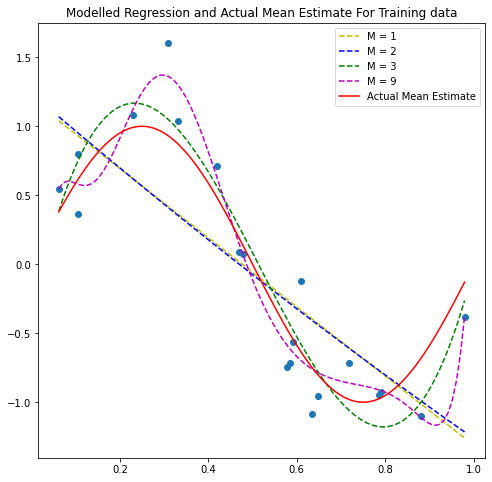

In [ ]:
plt = plot_values(train_X, train_Y, estimated_Y_matrix_on_training_set, w_cap_matrix, degree_list)
plt.title('Modelled Regression and Actual Mean Estimate For Training data')
plt.show()

# Question-8

Plot the estimate obtained by polynomial regression models for order M
=1,2,3 and 9 for testing set along with y’ 1, y’ 2, , y’ 50. . Also plot the sin(2 π x’ i )

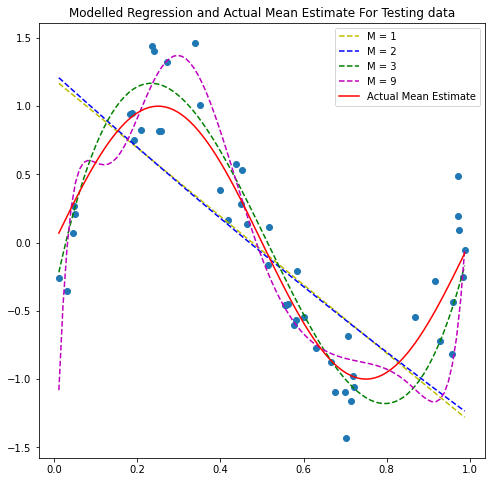

In [ ]:
plt = plot_values(test_X, test_Y, estimated_Y_matrix_on_testing_set, w_cap_matrix, degree_list)
plt.title('Modelled Regression and Actual Mean Estimate For Testing data')
plt.show()

# Question-9

The description and observations are mentioned under the section named 'REPORT' below.

# Question-10

The statistical reasons behind the observations are also discussed in section named 'REPORT' below.

# **REPORT**

## Question-1

We have created a function generate_X() to generate 20 random values of X are generated using the function 

```
numpy.random.uniform()
```
for complete code, check section 'Question-1'

## Question-2

We made another function generate_Y() to calculate equivalent Y values to their corresponding X. numpy.sin(2\*PI\*X) function is used to calculate the actual mean estimate values and numpy.random.normal() is used to generate 20 epsilon values. Both these values are added to generate Y for our training data.

Both these X and Y are zipped together to generate training data.

## Question-3

Function defined for question 1 and 2 are used to generate 50 testing data-points in similar fashion.

## Question-4 and Question-5

Function ***polynomial_regression_parameters()*** is created to calculate the least square polynomial's coefficient. This function also takes input the degree of the polynomial. It calculates using the formula for least square polynomial coefficient that coded from scratch in this function.

So, it is further used to generate the coefficient of polynomial for all different degree M = 1,2,3,9 and these coefficients are stored in a single matrix named ***w_cap_matrix*** .

These least square weights are also printed.(check section "Question-4 & Question-5")

## Question-6

Two functions are created ***predict_Y()*** and ***calculate_RMSE()*** for this question. In first function, it is used to calculate the estimated Y values for testing data-points using the *w_cap_matrix* calculated in previous section.

The second function is used to calculate the root mean square error using the estimated Y values and actual Y values from testing dataset.

Prediction values and RMSE are printed in the section "Question-6".

## Question-7

The same functions defined in question-6 are used to calculate the estimated Y values for training data-point in this question.

Further, we have plotted the figure containing our polynomial regression model for all the degree M=1,2,3,9 and actual mean estimated values.

**Check section "Question-7" to analyse the diagram**

## Question-8

We used the estimated Y values for testing data in question-6 to plot the figure containing our polynomial regression model for all the degree M=1,2,3,9 and actual mean estimated values.

**Check section "Question-8" to analyse the diagram**

## Question-9

If we increase the value of M which mean the highest degree of the polynomial then it means that the flexibility in our curve increases. So, it'll get more sensitive towards the noise.

For the observation, even in our code we have used 4 different M values(1,2,3,9). So, for all these M values **root mean square error** are as following:


1.   For Training Data:


*   RMSE for M = 1 : 0.10289561

*   RMSE for M = 2 : 0.10277106
*   RMSE for M = 3 : 0.02809325

*   RMSE for M = 9 : 0.01523558

  
2.   For Testing Data:

*   RMSE for M = 1 : 0.5047766

*   RMSE for M = 2 : 0.4978564
*   RMSE for M = 3 : 0.07851355

*   RMSE for M = 9 : 0.13469139

## Question-10

**Statistical Reasons behind observation :**

Looking at the RMSE, we can say that RMSE value for degree M = 9 is very low in case of training data but very high in case of testing data. Thus, we can conclude that the model must have overfitted in case of M=9. To improve this case, we'll have to perform regularization.

